In [1]:
# To Process Data
import pandas as pd
import numpy as np

# To Visualise Data
import matplotlib.pyplot as plt
import seaborn as sns
from Capstone_Group03 import plot_CF

# For Modelling
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
# For Bags-Of-Words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# For text-processing
import nltk
from nltk.corpus import stopwords
from Capstone_Group03 import remove_stopwords, remove_lemmatizing, remove_stemming

# To ignore Warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
inspection_df = pd.read_csv('./food_inspections.csv', low_memory=False)

In [3]:
inspection_df.columns

Index(['businessname', 'dbaname', 'legalowner', 'namelast', 'namefirst',
       'licenseno', 'issdttm', 'expdttm', 'licstatus', 'licensecat',
       'descript', 'result', 'resultdttm', 'violation', 'viollevel',
       'violdesc', 'violdttm', 'violstatus', 'statusdate', 'comments',
       'address', 'city', 'state', 'zip', 'property_id', 'location'],
      dtype='object')

## Text Processing

In [4]:
sa_feature = ['violdesc','result','resultdttm','comments','viollevel','violstatus','statusdate']
sa_df = inspection_df[sa_feature]
sa_df_cleaned = sa_df.dropna()

In [5]:
sa_cols = ['comments','viollevel']
sa_df_cleaned[sa_cols]['viollevel']

84          *
86          *
87          *
88        ***
89          *
         ... 
727643    ***
727645    ***
727646     **
727647     **
727648     **
Name: viollevel, Length: 300353, dtype: object

In [6]:
sentences = sa_df_cleaned['comments']

In [8]:
processed_sentences = []
for sentence in sentences:
#     temp = remove_stopwords(sentence)
    temp = remove_lemmatizing(sentence)
    processed_sentences.append(remove_stemming(temp))

In [9]:
sentences = pd.Series(processed_sentences)
labels = LabelEncoder().fit_transform(sa_df_cleaned['viollevel'])

In [10]:
embedding_dim = 200
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok='OOV'
training_size = int(len(sentences)*0.7)

In [11]:
training_sentences = sentences[0:training_size].copy()
testing_sentences = sentences[training_size:].copy()
training_labels = labels[0:training_size].copy()
testing_labels = labels[training_size:].copy()

In [12]:
#training shape
training_sentences.shape

(210247,)

In [13]:
training_labels.shape

(210247,)

In [14]:
testing_sentences.shape

(90106,)

In [15]:
testing_labels.shape

(90106,)

# Bags Of Words
### Gradient Boost
### Naive Bayes

In [16]:
vect = CountVectorizer()

In [17]:
training_vect = vect.fit_transform(training_sentences)
testing_vect = vect.transform(testing_sentences)

In [18]:
training_vect.shape

(210247, 23277)

In [19]:
testing_vect.shape

(90106, 23277)

In [20]:
i = 4690
j = 10
words = vect.get_feature_names()[i:i+10]
pd.DataFrame(training_vect[j:j+10,i:i+10].todense(),columns=words)

C:\Users\Mxnxn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cloths,clothsin,clothu,clotnh,clotrh,clotrhs,clotsh,cloudi,clove,cloves
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [21]:
print(f'Number of Features {len(vect.get_feature_names())}')
print(f'Number of Features {vect.get_feature_names()[:20]}')

Number of Features 23277
Number of Features ['00', '000', '002', '003', '006b', '008', '009', '00am', '00pm', '00ppm', '01', '012', '012h', '013', '014', '015', '02', '02118', '02pm', '03']


C:\Users\Mxnxn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
GB_clf = GradientBoostingClassifier()
NB_clf = MultinomialNB()

In [23]:
GB_clf.fit(training_vect,training_labels)

GradientBoostingClassifier()

In [24]:
GB_clf.score(training_vect,training_labels)

0.8306230291038635

In [25]:
y_pred2 = GB_clf.predict(testing_vect)

In [26]:
confusion_matrix(testing_labels,y_pred2)

array([[63164,   270,   890],
       [ 5442,  3784,   896],
       [ 7451,   247,  7962]], dtype=int64)

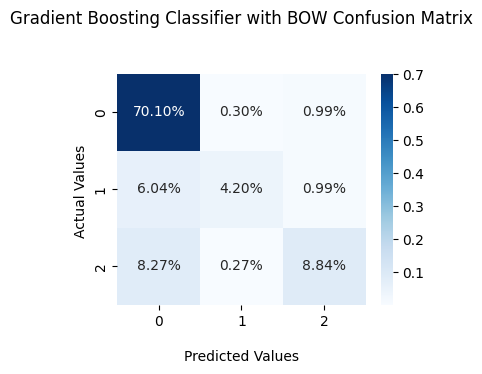

In [27]:
plot_CF(confusion_matrix(testing_labels,y_pred2),'Gradient Boosting Classifier with BOW')

In [28]:
NB_clf.fit(training_vect,training_labels)

MultinomialNB()

In [29]:
NB_clf.score(training_vect,training_labels)

0.8520930144068644

In [30]:
y_pred = NB_clf.predict(testing_vect)

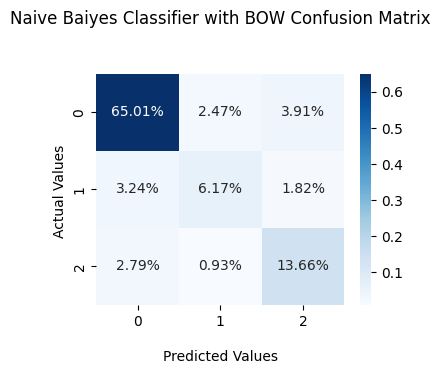

In [31]:
plot_CF(confusion_matrix(testing_labels,y_pred),'Naive Baiyes Classifier with BOW')

# Simple Neural Network for Sentiment Analysis

In [36]:
tokenizer = Tokenizer(num_words=len(sentences))
tokenizer.fit_on_texts(sentences)
tokenizer

In [37]:
vocab_size = len(tokenizer.word_index)

In [38]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [39]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [40]:
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          5764000   
                                                                 
 global_average_pooling1d (G  (None, 200)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                3216      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,767,233
Trainable params: 5,767,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

In [ ]:
sentence = ["Dark spots on chopping boards."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred3 = model.predict(padded)
print(f"For this comment '{sentence[0]}' it classify '{y_pred3[0][0]}' mean level 1 violation.")